In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
os.getcwd()
os.chdir("D:\\Mlops Project")

In [11]:
data = pd.read_csv("data\stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [22]:
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [23]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [24]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: ['math_score', 'reading_score', 'writing_score']
Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [ ]:
data['total_marks'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average_marks'] = data['total_marks'] / 3
data[['total_marks','gender']].head()

,total_marks,gender
0,218,female
1,247,female
2,278,female
3,148,male
4,229,male


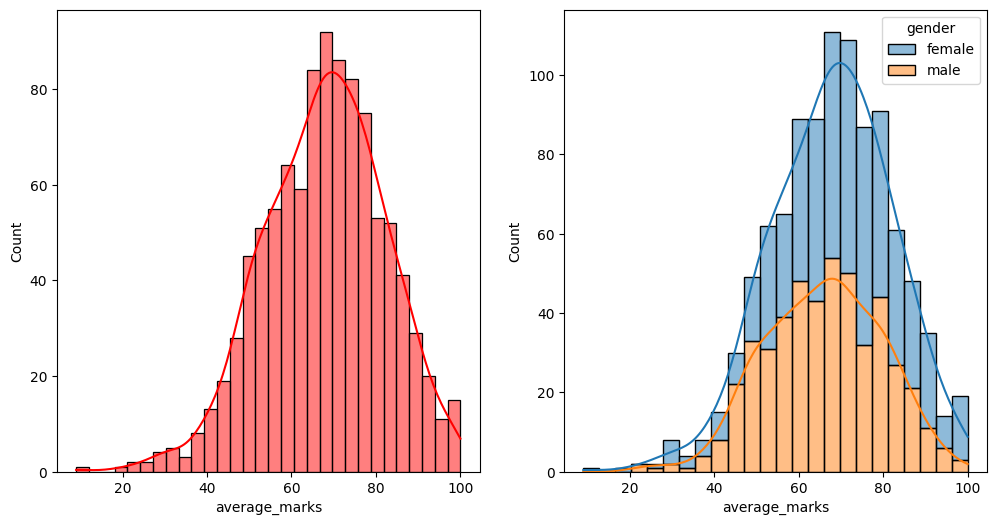

In [34]:
fig , axis = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)

sns.histplot(data['average_marks'], bins=30, kde=True, color='red')
plt.subplot(122)

sns.histplot(data = data, x = 'average_marks', kde=True, hue='gender', multiple='stack')
plt.show()

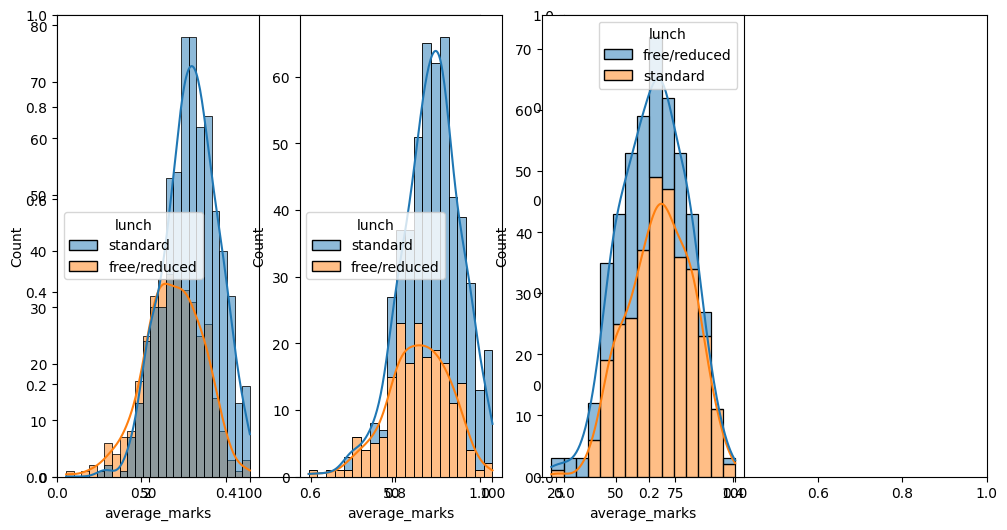

In [36]:
fig , axis = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(141)

sns.histplot(data, x = 'average_marks', kde=True, color='red', hue='lunch')
plt.subplot(142)

sns.histplot(data = data[data.gender == 'female'], x = 'average_marks', kde=True, hue='lunch', multiple='stack')
plt.subplot(143)

sns.histplot(data = data[data.gender == 'male'], x = 'average_marks', kde=True, hue='lunch', multiple='stack')
plt.show()